Importing the necessary libraries

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [268]:
df.shape

(891, 12)

We have 12 columns and 891 rows in our dataset

In [269]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

These are the columns available in our data saet

In [270]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We have 177 missing value in Sex column abd 687 missing value in cabin.

In [271]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [272]:
df['Age'].min(), data['Age'].max()

(0.42, 80.0)

In [273]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [274]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

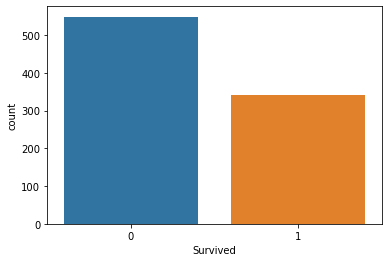

In [275]:
sns.countplot(x='Survived', data = df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

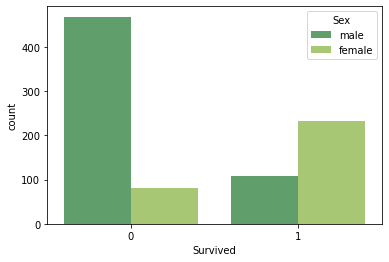

In [276]:
sns.countplot(x='Survived', hue ='Sex', data = df, palette = 'summer')

<AxesSubplot:xlabel='Survived', ylabel='count'>

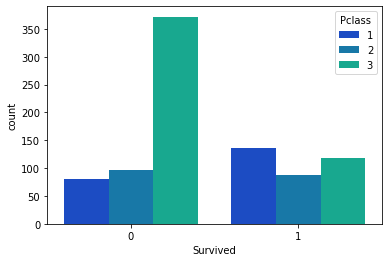

In [277]:
sns.countplot(x='Survived', hue ='Pclass', data = df, palette = 'winter')

<AxesSubplot:ylabel='Frequency'>

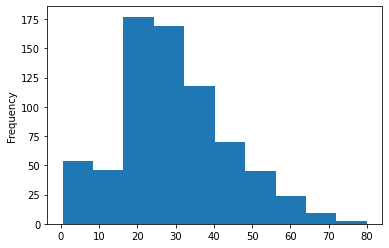

In [278]:
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

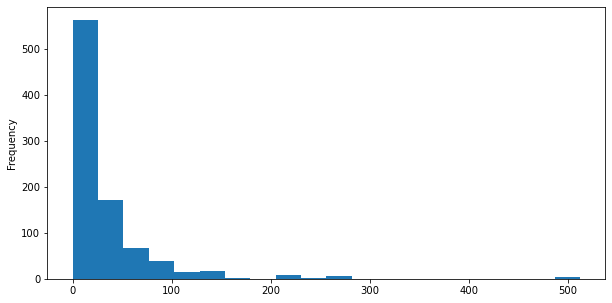

In [279]:
df['Fare'].plot.hist(bins=20, figsize=(10,5))

<AxesSubplot:ylabel='Frequency'>

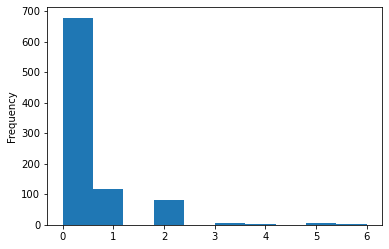

In [280]:
df['Parch'].plot.hist()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

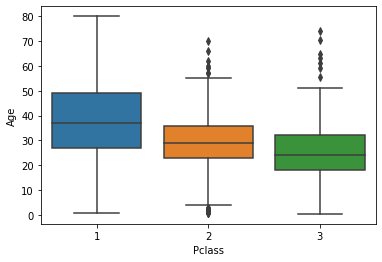

In [281]:
sns.boxplot(x='Pclass', y = 'Age', data = df)

In [282]:
df.drop('Cabin', axis=1, inplace = True)

In [283]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [284]:
df.dropna(inplace=True)

In [285]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Model Building process

In [286]:
sex = pd.get_dummies(df['Sex'],drop_first = True)
embark = pd.get_dummies(df['Embarked'], drop_first = True)
pc= pd.get_dummies(df['Pclass'], drop_first = True)

In [287]:
titanic = pd.concat([df, sex, embark,pc], axis =1)

In [288]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,0,1,0,0,1
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [289]:
titanic.drop(['Name', 'PassengerId','Pclass','Ticket', 'Sex','Embarked'], axis =1, inplace = True)

In [290]:
titanic

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,0,1,0,0,1
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [291]:
x= titanic.drop('Survived', axis =1)
y= titanic['Survived']

In [292]:
from sklearn.model_selection import train_test_split

In [293]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.25, random_state=4)

In [294]:
from sklearn.linear_model import LogisticRegression
lm =LogisticRegression()

In [295]:
lm.fit(x_train, y_train)

C:\Users\rahul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [296]:
prediction = lm.predict(x_test)

# LogisticRegression

In [297]:
from sklearn.metrics import classification_report

In [298]:
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.80      0.90      0.85       109\n           1       0.80      0.65      0.72        69\n\n    accuracy                           0.80       178\n   macro avg       0.80      0.78      0.78       178\nweighted avg       0.80      0.80      0.80       178\n'

In [299]:
from sklearn.metrics import confusion_matrix

In [300]:
confusion_matrix(y_test, prediction)

array([[98, 11],
       [24, 45]], dtype=int64)

In [301]:
from sklearn.metrics import accuracy_score

In [302]:
accuracy_score(y_test,prediction)

0.8033707865168539

# Random Forest Classifier

In [305]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
accuracy_score(y_test, rf.predict(x_test))

0.8146067415730337

# Decision Tree Classifier

In [306]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
accuracy_score(y_test, dt.predict(x_test))

0.7247191011235955